0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
오차 행렬
[[88 12]
 [23 31]]
정확도 0.7727, 정밀도 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919


C:\Users\jiyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


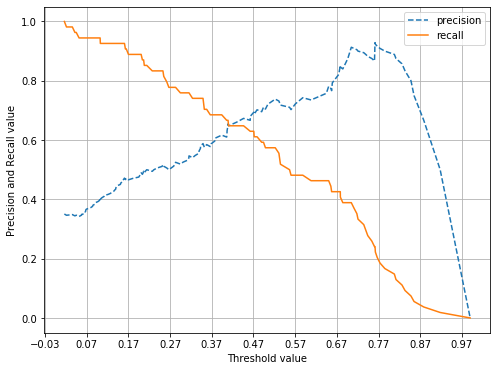

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


오차 행렬
[[89 11]
 [20 34]]
정확도 0.7987, 정밀도 0.7556, 재현율 : 0.6296, F1 : 0.6869, AUC : 0.8404


임계값 :  0.3
오차 행렬
[[68 32]
 [10 44]]
정확도 0.7273, 정밀도 0.5789, 재현율 : 0.8148, F1 : 0.6769, AUC : 0.8404
임계값 :  0.33
오차 행렬
[[71 29]
 [11 43]]
정확도 0.7403, 정밀도 0.5972, 재현율 : 0.7963, F1 : 0.6825, AUC : 0.8404
임계값 :  0.36
오차 행렬
[[74 26]
 [14 40]]
정확도 0.7403, 정밀도 0.6061, 재현율 : 0.7407, F1 : 0.6667, AUC : 0.8404
임계값 :  0.39
오차 행렬
[[77 23]
 [14 40]]
정확도 0.7597, 정밀도 0.6349, 재현율 : 0.7407, F1 : 0.6838, AUC : 0.8404
임계값 :  0.42
오차 행렬
[[80 20]
 [16 38]]
정확도 0.7662, 정밀도 0.6552, 재현율 : 0.7037, F1 : 0.6786, AUC : 0.8404
임계값 :  0.45
오차 행렬
[[81 19]
 [17 37]]
정확도 0.7662, 정밀도 0.6607, 재현율 : 0.6852, F1 : 0.6727, AUC : 0.8404
임계값 :  0.48
오차 행렬
[[88 12]
 [19 35]]
정확도 0.7987, 정밀도 0.7447, 재현율 : 0.6481, F1 : 0.6931, AUC : 0.8404
임계값 :  0.5
오차 행렬
[[89 11]
 [20 34]]
정확도 

C:\Users\jiyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer


diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()
diabetes_data.info()

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall,f1, roc_auc))
    

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize =(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], ls = '--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()    
    
# 피처 덷이터 세트 X, 레이블 데이터 세트 y를 추출
X = diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 전체 데이터의 65%가 negative이다. 따라서 재현율에 초점을 맞춘다.
# 재현율은 positive 데이터를 negative로 잘못 판단하면 큰 오류를 범하게 된다. 
# 그러므로 병에 관한 데이터는 재현율에 초점을 맞춘다.

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

# 그래프를 확인결과, 재현율과 정밀도가 균형을 맞추는 구간임에도 두 지표가 0.7도 안넘는 것을 알 수 있다.
# 따라서 데이터를 다시 확인한다.

diabetes_data.describe()

# 0이면 안될 피처가 0이다.
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
print('\n')
    
# skinThickness, Insulin의 0의 비율이 굉장히 높다.
# 총 데이터의 수가 많지 않으므로 이 0의 데이터를 제거하면 학습이 효과적이지 않다.
# 그러므로 평균값으로 대체한다.

mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)


X = diabetes_data.iloc[:,:-1]
y =diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

print('\n')

# 임계값 조정

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1[:,1].reshape(-1,1))
        
        print('임계값 : ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1[:,1])

thresholds =[0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba, thresholds)


print('\n')


binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])





0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
오차 행렬
[[88 12]
 [23 31]]
정확도 0.7727, 정밀도 0.7209, 재현율 : 0.5741, F1 : 0.6392, AUC : 0.7919


C:\Users\jiyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


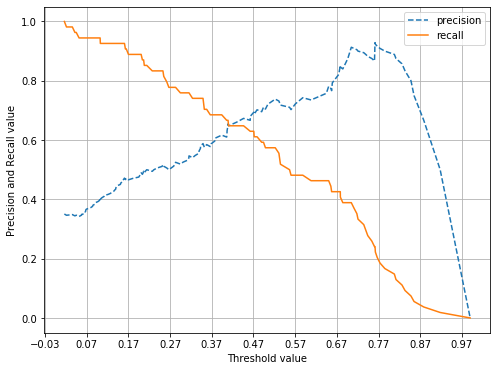

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer


diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()
diabetes_data.info()

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall,f1, roc_auc))
    

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize =(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], ls = '--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()    
    
# 피처 덷이터 세트 X, 레이블 데이터 세트 y를 추출
X = diabetes_data.iloc[:,:-1]
y= diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 전체 데이터의 65%가 negative이다. 따라서 재현율에 초점을 맞춘다.
# 재현율은 positive 데이터를 negative로 잘못 판단하면 큰 오류를 범하게 된다. 
# 그러므로 병에 관한 데이터는 재현율에 초점을 맞춘다.

pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

# 그래프를 확인결과, 재현율과 정밀도가 균형을 맞추는 구간임에도 두 지표가 0.7도 안넘는 것을 알 수 있다.
# 따라서 데이터를 다시 확인한다.

diabetes_data.describe()